# Análisis de paquetes

In [ ]:
import pandas as pd



In [5]:
def get_entropy(entropy_path = "wifiUbaLabo3/fuente_ent_info_red_wifi_UBA_Labo3.txt"):
    entropy_file = open(entropy_path, "r")
    lines = entropy_file.readlines()
    entropy = []
    for line in lines:
        if(line.split(' ')[0] == "Entropia:"):
            entropy.append(float(line.split(' ')[1]))
    return entropy


Text(0, 0.5, 'entropia')

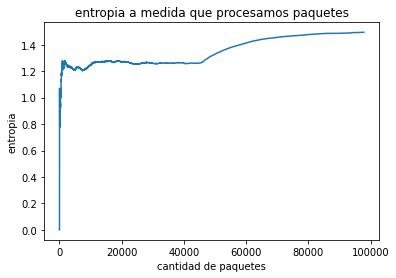

In [9]:
import matplotlib.pyplot as plt

plt.plot(get_entropy())
plt.title("entropia a medida que procesamos paquetes")
plt.xlabel("cantidad de paquetes")
plt.ylabel("entropia")
plt.show()

In [24]:
def show_source(source_path = "wifiUbaLabo3/fuente_final.txt"):
    source_file =open(source_path, "r")
    lines = source_file.readlines()
    unicast_broadcast_symbol = []
    protocol = []
    for line in lines:
        get_symbol = line.split("(")[1].split(")")[0].split(',')
        unicast_broadcast_symbol.append(get_symbol[0].split("'")[1])
        protocol.append(get_symbol[1].split("'")[0])
    return unicast_broadcast_symbol, protocol


(array([2., 0., 0., 1., 0., 0., 2., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

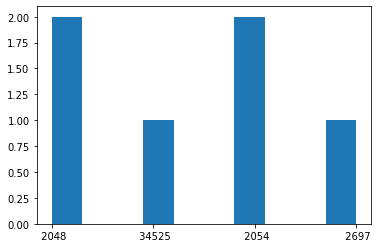

In [29]:
unicast_broadcast_symbol, protocol = show_source()

plt.hist(protocol)
